In [1]:
import sys
sys.path.append("./algo")
from algo.image_detector import clone_yolo_from_github, select_model
from util.format_funcs import load_config
import shutil
import os
from PIL import Image
from matplotlib import pyplot as plt

config = load_config("algo/detector.yaml")

exp_dir = "."
yolo_model = "yolov10l"
image = "/fs/ess/PAS2136/ggr_data/image_data/GZCD/images/23cfa1f4-cbb7-5aa9-b93f-4c6c328b8dc2.jpg"

yolo_dir = os.path.join(exp_dir, config["yolo_dir"])
github_v10_url = config["github_v10_url"]
shutil.rmtree(yolo_dir, ignore_errors=True)

clone_yolo_from_github(yolo_dir, github_v10_url)

model_dir = os.path.join(yolo_dir, config["model_dir"])
os.makedirs(model_dir, exist_ok=True)


detector = select_model(yolo_model, config, model_dir)



Ultralytics 8.3.121 🚀 Python-3.11.0 torch-2.7.0+cu126 CPU (Intel Xeon Max 9470)
Setup complete ✅ (104 CPUs, 1134.6 GB RAM, 48.3/190.0 GB disk)
Cloning repository https://github.com/THU-MIG/yolov10.git into ./Yolo_v10...


Cloning into './Yolo_v10'...


Successfully Downloaded yolov10l to ./Yolo_v10/weights/yolov10l.pt
Model device: cpu


In [2]:
res = detector(image, conf=config["confidence_threshold"], imgsz=config["img_size"], verbose=True)


image 1/1 /fs/ess/PAS2136/ggr_data/image_data/GZCD/images/23cfa1f4-cbb7-5aa9-b93f-4c6c328b8dc2.jpg: 576x736 (no detections), 390.8ms
Speed: 3.9ms preprocess, 390.8ms inference, 0.2ms postprocess per image at shape (1, 3, 576, 736)


In [3]:
import matplotlib.patches as patches
import cv2

def plot_yolo_results(image_path, results, conf_threshold=0.25, save_path=None):
    """
    Plot YOLOv10 detection results using matplotlib
    
    Args:
        image_path (str): Path to input image
        results: YOLOv10 results object from model inference
        conf_threshold (float): Confidence threshold for filtering detections
        save_path (str): Path to save the plotted image (optional)
    
    Returns:
        fig, ax: matplotlib figure and axis objects
    """
    
    # Load and convert image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(image)
    
    # Process detections from results
    if len(results) > 0 and results[0].boxes is not None:
        result = results[0]
        
        # Extract detection data
        boxes = result.boxes.xyxy.cpu().numpy()  # x1, y1, x2, y2
        confidences = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        class_names = result.names
        
        # Filter by confidence threshold
        mask = confidences >= conf_threshold
        boxes = boxes[mask]
        confidences = confidences[mask]
        class_ids = class_ids[mask]
        
        # Draw bounding boxes and labels
        for box, conf, cls_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = box
            
            # Draw rectangle
            rect = patches.Rectangle(
                (x1, y1), x2 - x1, y2 - y1,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)
            
            # Add label
            label = f"{class_names[cls_id]}: {conf:.2f}"
            ax.text(x1, y1 - 5, label, fontsize=10, color='red',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    ax.set_title('YOLOv10 Detection Results', fontsize=16, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    return fig, ax

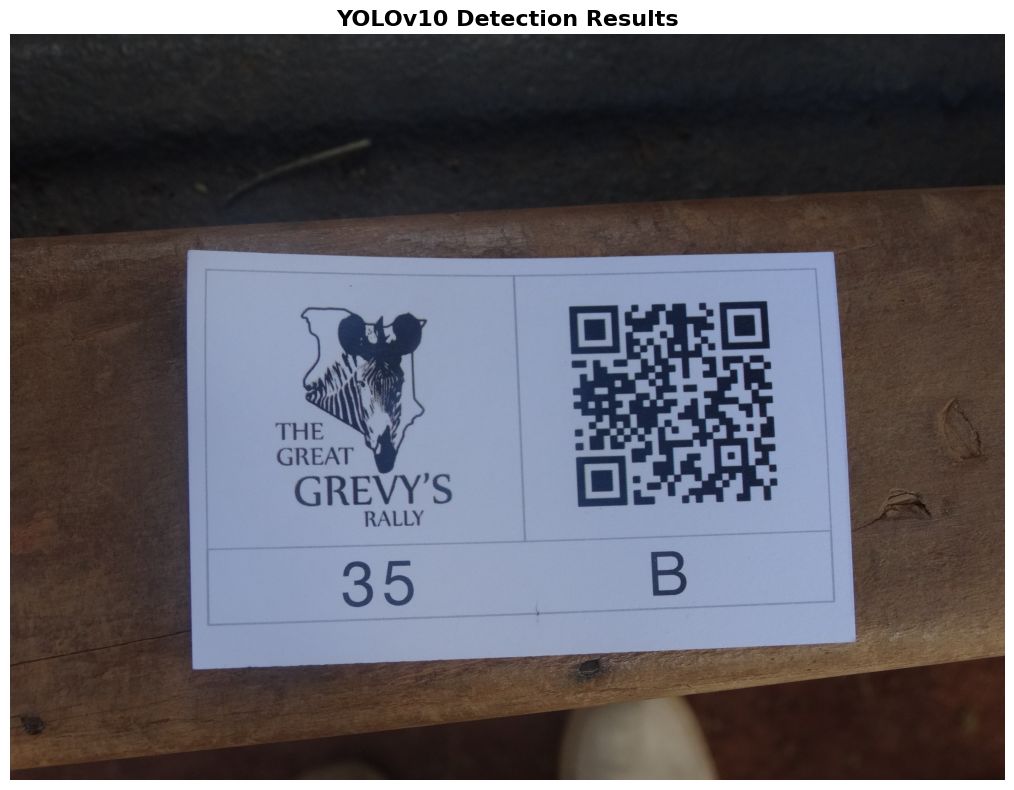

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'YOLOv10 Detection Results'}>)

In [4]:
plot_yolo_results(image, res, conf_threshold=0, save_path=None)